In [1]:
#ashwin 
#pip install opencv-python
import cv2

In [2]:
#pip install matplotlib
import matplotlib.pyplot as plt

In [3]:
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pb'

In [4]:
model = cv2.dnn_DetectionModel(frozen_model, config_file)

In [5]:
classLabels = []  #empty list in python
file_name = 'coco.txt'
with open(file_name, 'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')
    #classLabels.append(fpt, read())

In [6]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'dog', 'cat', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [7]:
print(len(classLabels))

80


In [8]:
model.setInputSize(320, 320)
model.setInputScale(1.8/127.5)
model.setInputMean(127.5)
model.setInputSwapRB(True)

<dnn_Model 00000229B6B5E950>

In [9]:
#read an image
img = cv2.imread('Re0cb978b4f31cb68e18b88b919730e48.jpg')

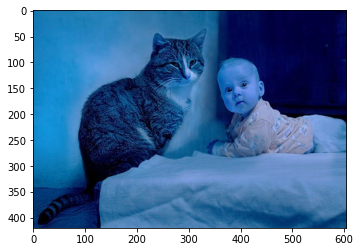

In [10]:
plt.imshow(img)

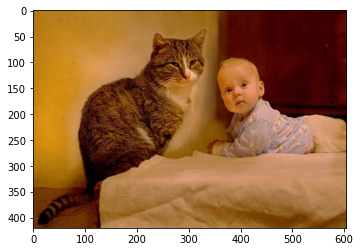

In [11]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [12]:
classIndex , confidece , bbox = model.detect(img, confThreshold = 0.7)

In [13]:
print(classIndex)

[[ 1]
 [17]]


In [14]:
font_scale = 1
font = cv2.FONT_HERSHEY_PLAIN
for classInd, conf, boxes in zip(classIndex.flatten(), confidece.flatten(), bbox):
    cv2.rectangle(img, boxes, (255,0,0), 1)
    cv2.putText(img, classLabels[classInd-1], (boxes[0]+10, boxes[1]+40), font, font_scale, (0,255,0), 1, cv2.LINE_AA)

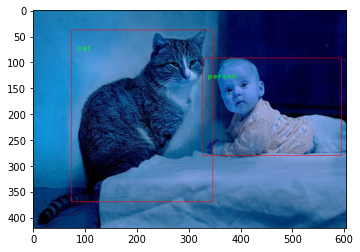

In [15]:
plt.imshow(img)

In [16]:
cap = cv2.VideoCapture('WhatsApp Video 2021-02-20 at 00.14.27.mp4')
if not (cap.isOpened()):
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("reload your video")
    
font_scale = 2
font = cv2.FONT_HERSHEY_PLAIN

while(True):
    ret, frame = cap.read()
    
    classIndex , confidece , bbox = model.detect(frame, confThreshold = 0.2)
    print(classIndex)
    if (len(classIndex) != 0):
        for classInd, conf, boxes in zip(classIndex.flatten(), confidece.flatten(), bbox):
            if(classInd <= 80):
                cv2.rectangle(frame, boxes, (255,0,0), 3)
                cv2.putText(frame, classLabels[classInd-1], (boxes[0]+10, boxes[1]+40), font, font_scale, (0,255,0), 1, cv2.LINE_AA)
        

    cv2.imshow('Image', frame)

    if(cv2.waitKey(2) & 0xFF == ord('q')):
        break

cap.release()
cv2.destroyAllWindows()


[[ 1]
 [ 1]
 [ 1]
 [ 7]
 [ 1]
 [62]
 [62]
 [ 1]
 [62]
 [ 7]
 [ 1]
 [62]
 [62]
 [62]
 [62]
 [62]
 [70]
 [ 1]
 [62]
 [62]
 [62]
 [62]
 [62]
 [ 7]
 [70]
 [62]
 [ 1]
 [62]
 [62]
 [62]
 [62]
 [62]
 [70]
 [62]
 [15]
 [ 1]
 [62]
 [62]
 [ 1]
 [62]
 [31]
 [62]
 [62]
 [62]
 [ 1]
 [62]
 [62]
 [11]
 [70]
 [65]
 [62]
 [62]
 [70]
 [31]
 [15]
 [70]
 [ 1]
 [62]
 [65]
 [62]
 [62]
 [62]]
[[ 1]
 [ 7]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [62]
 [62]
 [ 7]
 [ 1]
 [ 7]
 [ 1]
 [62]
 [62]
 [ 1]
 [62]
 [62]
 [62]
 [62]
 [62]
 [70]
 [70]
 [62]
 [62]
 [65]
 [62]
 [62]
 [62]
 [70]
 [62]
 [62]
 [ 1]
 [31]
 [62]
 [70]
 [62]
 [ 1]
 [62]
 [70]
 [62]
 [62]
 [62]
 [62]
 [15]
 [ 1]
 [62]
 [ 6]
 [70]
 [ 1]
 [70]
 [62]]
[[ 7]
 [ 1]
 [ 1]
 [ 1]
 [62]
 [62]
 [62]
 [62]
 [ 1]
 [62]
 [28]
 [ 1]
 [ 1]
 [62]
 [62]
 [62]
 [ 7]
 [70]
 [62]
 [62]
 [ 1]
 [62]
 [70]
 [62]
 [70]
 [62]
 [ 1]
 [70]
 [62]
 [65]
 [70]
 [62]
 [62]
 [62]
 [62]
 [62]
 [28]
 [62]
 [62]
 [42]
 [62]
 [ 1]
 [62]
 [62]
 [31]
 [62]
 [ 1]
 [62]
 [ 1]
 [70]
 [70]
 [62]
 [62]
 [

[[ 1]
 [62]
 [ 7]
 [62]
 [62]
 [62]
 [62]
 [ 1]
 [62]
 [62]
 [62]
 [62]
 [ 1]
 [62]
 [62]
 [ 7]
 [ 1]
 [62]
 [62]
 [15]
 [62]
 [62]
 [15]
 [62]
 [15]
 [ 1]
 [15]
 [ 1]
 [62]
 [ 1]
 [62]
 [62]
 [62]
 [ 1]
 [62]
 [62]
 [ 1]
 [ 7]
 [62]
 [62]
 [15]
 [62]
 [62]
 [62]
 [62]
 [62]
 [15]
 [62]
 [62]
 [15]
 [62]
 [62]
 [62]
 [15]
 [31]
 [62]
 [15]
 [62]
 [ 7]
 [ 1]
 [15]
 [ 1]
 [15]
 [ 1]
 [62]
 [62]
 [62]
 [11]]
[[ 1]
 [62]
 [ 7]
 [ 1]
 [62]
 [ 1]
 [62]
 [62]
 [ 1]
 [62]
 [62]
 [ 1]
 [15]
 [62]
 [62]
 [62]
 [62]
 [62]
 [62]
 [ 1]
 [62]
 [62]
 [62]
 [62]
 [62]
 [62]
 [ 7]
 [62]
 [62]
 [62]
 [ 7]
 [62]
 [62]
 [ 1]
 [62]
 [15]
 [62]
 [31]
 [15]
 [62]
 [ 1]
 [62]
 [62]
 [15]
 [15]
 [11]
 [62]
 [62]
 [28]
 [ 1]
 [62]
 [62]
 [15]
 [15]
 [15]
 [ 1]
 [62]
 [ 1]
 [62]
 [62]
 [15]
 [ 1]
 [31]
 [62]
 [ 1]
 [ 1]
 [62]
 [15]
 [15]
 [15]]
[[ 1]
 [62]
 [ 7]
 [ 1]
 [ 1]
 [62]
 [62]
 [62]
 [62]
 [62]
 [15]
 [ 1]
 [ 1]
 [ 1]
 [62]
 [62]
 [62]
 [ 7]
 [62]
 [15]
 [62]
 [15]
 [62]
 [62]
 [62]
 [62]
 [62]
 [62]
 [

KeyboardInterrupt: 